In [10]:
import yfinance as yf
import pandas as pd

ticker = "^GSPC"
data = yf.download(ticker, start="2010-01-01", end="2025-08-01", interval="1d", progress=False)
prices = data["Close"].dropna()  # use Close because it's already adjusted
print(prices.values.shape)
print(prices)d

(3918, 1)
Ticker            ^GSPC
Date                   
2010-01-04  1132.989990
2010-01-05  1136.520020
2010-01-06  1137.140015
2010-01-07  1141.689941
2010-01-08  1144.979980
...                 ...
2025-07-25  6388.640137
2025-07-28  6389.770020
2025-07-29  6370.859863
2025-07-30  6362.899902
2025-07-31  6339.390137

[3918 rows x 1 columns]


/tmp/ipykernel_4891/3177803833.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2010-01-01", end="2025-08-01", interval="1d", progress=False)


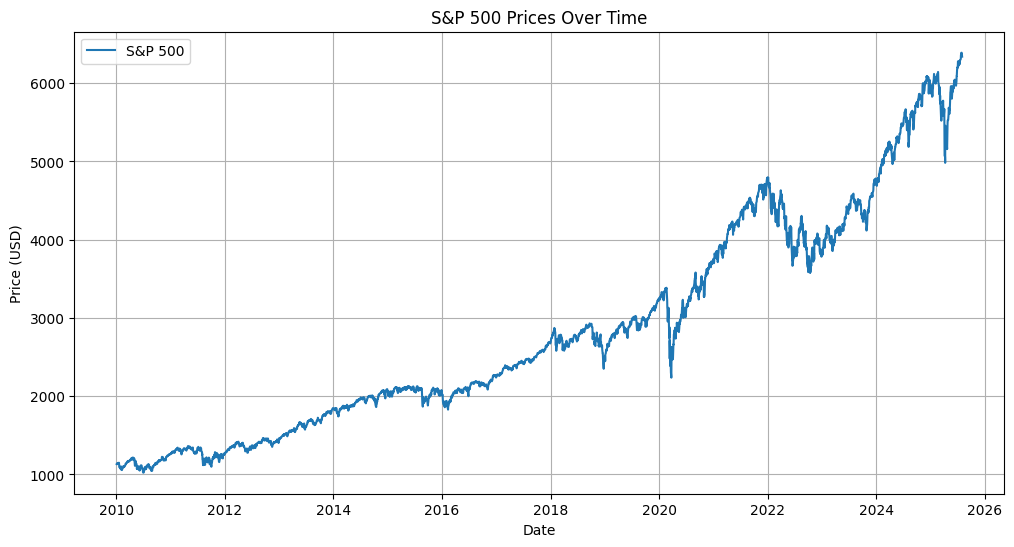

In [3]:
import matplotlib.pyplot as plt

# prices is your Series with Date as index
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices.values, label="S&P 500")
plt.title("S&P 500 Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
import numpy as np

logrets = np.log(prices / prices.shift(1)).dropna()
dt = 1/252  # daily -> annual convention
mu_hat = logrets.mean() / dt
sigma_hat = logrets.std(ddof=1) / np.sqrt(dt)

print("Estimated annual drift (mu):", mu_hat)
print("Estimated annual volatility (sigma):", sigma_hat)

Estimated annual drift (mu): Ticker
^GSPC    0.11078
dtype: float64
Estimated annual volatility (sigma): Ticker
^GSPC    0.17502
dtype: float64


In [9]:
np.savez(f"training_data/SNP500.npz", trajectories=prices.values.reshape(1, 1, -1))

In [1]:
import yfinance as yf
import pandas as pd

ticker = "SPY"
spy = yf.Ticker(ticker)

# List all available expiry dates
expiry_dates = spy.options  # returns list of strings like '2025-09-19'
print("Available expiries:", expiry_dates)

Available expiries: ('2025-09-05', '2025-09-08', '2025-09-09', '2025-09-10', '2025-09-11', '2025-09-12', '2025-09-19', '2025-09-26', '2025-09-30', '2025-10-03', '2025-10-10', '2025-10-17', '2025-10-31', '2025-11-21', '2025-11-28', '2025-12-19', '2025-12-31', '2026-01-16', '2026-01-30', '2026-02-20', '2026-02-27', '2026-03-20', '2026-03-31', '2026-06-18', '2026-06-30', '2026-09-18', '2026-12-18', '2027-01-15', '2027-12-17')


In [3]:
import yfinance as yf
import pandas as pd
import numpy as np

# Select the Close column for SPY
prices = data[("Close", "SPY")].dropna()

# Save in the same format as your SDE training data
np.savez("training_data/SPY.npz", trajectories=prices.values.reshape(1, 1, -1))

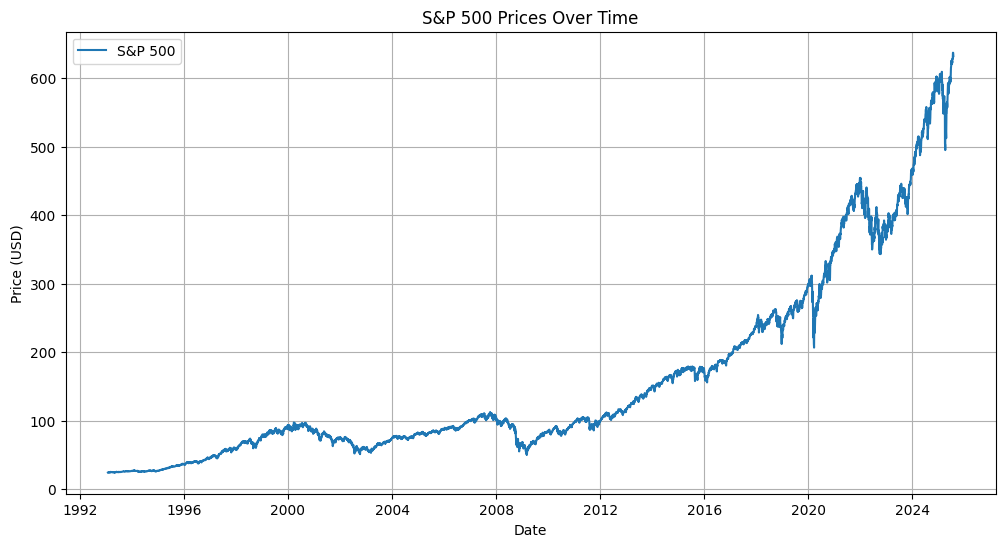

(8182,)


In [5]:
import matplotlib.pyplot as plt

# prices is your Series with Date as index
plt.figure(figsize=(12, 6))
plt.plot(prices.index, prices.values, label="S&P 500")
plt.title("S&P 500 Prices Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.legend()
plt.show()

print(prices.shape)

In [ ]:
# import pandas as pd
# import numpy as np

# # File and columns
# usecols = [" [QUOTE_DATE]", " [UNDERLYING_LAST]", " [EXPIRE_DATE]", " [DTE]", 
#            " [STRIKE]", " [C_BID]", " [C_ASK]", " [C_LAST]"]

# filename = "training_data/spy_2020_2022.csv"
# output_file = "training_data/compressed_spy_2020_2022.csv"
# n_samples = 10000
# chunksize = 100000

# # Reservoir sampling
# def random_sample_csv(filename, usecols, n_samples=10000, chunksize=100000):
#     rng = np.random.default_rng()
#     sample = None
#     seen = 0

#     for chunk in pd.read_csv(filename, usecols=usecols, chunksize=chunksize):
#         if sample is None:
#             sample = chunk.iloc[:0].copy()  # empty df with correct columns

#         for row in chunk.itertuples(index=False):
#             seen += 1
#             if len(sample) < n_samples:
#                 sample.loc[len(sample)] = row
#             else:
#                 j = rng.integers(0, seen)
#                 if j < n_samples:
#                     sample.iloc[j] = row

#     return sample

# # Sample the CSV
# df_sample = random_sample_csv(filename, usecols, n_samples, chunksize)

# # Clean column names
# df_sample.columns = df_sample.columns.str.strip().str.replace("[", "").str.replace("]", "")

# # Save to new CSV
# df_sample.to_csv(output_file, index=False)
# print(f"Saved {len(df_sample)} sampled rows to {output_file}")